In [1]:
from rembg import remove

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

THRESHOLD = 70


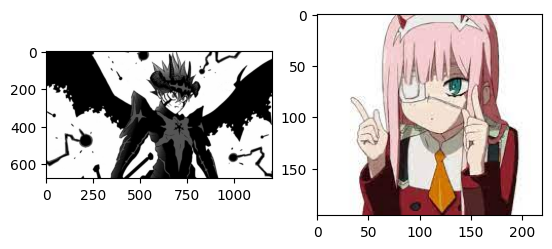

In [113]:
# import image
image_one_to_remove_bg = Image.open("image_to_remove_background.jpg").convert("RGB")
image_two_to_remove_bg = Image.open("darling.jpeg").convert("RGB")

image_one_to_remove_bg_as_np_array = np.array(image_one_to_remove_bg)
image_two_to_remove_bg_as_np_array = np.array(image_two_to_remove_bg)

plt.subplot(1, 2, 1)
plt.imshow(image_one_to_remove_bg_as_np_array)
plt.subplot(1, 2, 2)
plt.imshow(image_two_to_remove_bg_as_np_array)


In [35]:
def convert_to_grayscale(np_image: np.array):
    image_in_gray_scale = np.average(np_image[:, :, :3], axis=2)
    return image_in_gray_scale
    

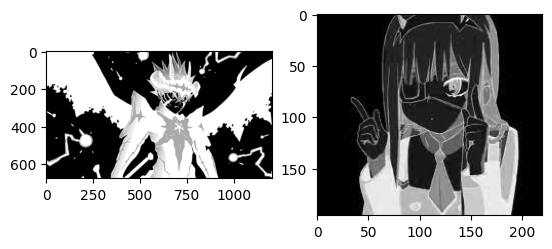

In [66]:
image_one_to_remove_bg_as_np_array_grayscale = convert_to_grayscale(image_one_to_remove_bg_as_np_array)
image_two_to_remove_bg_as_np_array_grayscale = convert_to_grayscale(image_two_to_remove_bg_as_np_array)

plt.subplot(1, 2, 1)
plt.imshow(image_one_to_remove_bg_as_np_array_grayscale, cmap="gray_r")
plt.subplot(1, 2, 2)
plt.imshow(image_two_to_remove_bg_as_np_array_grayscale, cmap="gray_r")


In [126]:
image_two_without_background = remove(image_two_to_remove_bg_as_np_array_grayscale)

NameError: name 'remove' is not defined